In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tifffile

In [37]:
def binomial_sort(n):
    list1 = np.random.binomial(n,0.5,size = 1000)
    list2 = []
    list3 = []
    for i in list1:
        if i < 0.5*n:
            list2.append(n-i)
            list3.append(i)
        else:
            list2.append(i)
            list3.append(n-i)
    return np.average(list2)/np.average(list3)

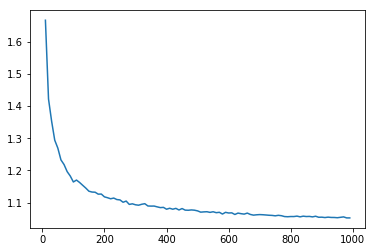

In [40]:
x = []
y = []
for i in range(10,1000,10):
    x.append(i)
    y.append(binomial_sort(i))
plt.plot(x,y)

In [118]:
n = 10000
l = 101
output_data_1 = []
while n>=0:
    scale = 1
    base = np.cos((np.arange(l)+2*np.pi*np.random.normal(size=1)))
    data = (base+base*np.random.normal(loc=0,scale = scale,size=l))
    data = 2*(data-data.min())/(data.max()-data.min())
    hl = int(0.5*l)
    if data[:hl].mean() < data[-hl:].mean():
        data = np.flip(data)
    output_data_1.append(data)
    n -= 1

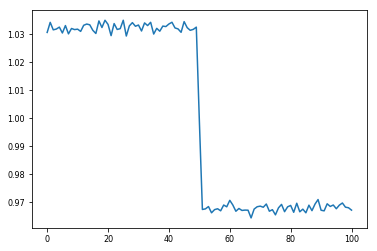

In [39]:
plt.plot(np.average(np.array(output_data),axis=0))

In [15]:
1.035/0.965

1.072538860103627

In [63]:
a = np.average(np.array(output_data_1),axis=0)

(<Figure size 988.8x604.8 with 2 Axes>,
 <matplotlib.image.AxesImage at 0x12cd5c4a8>)

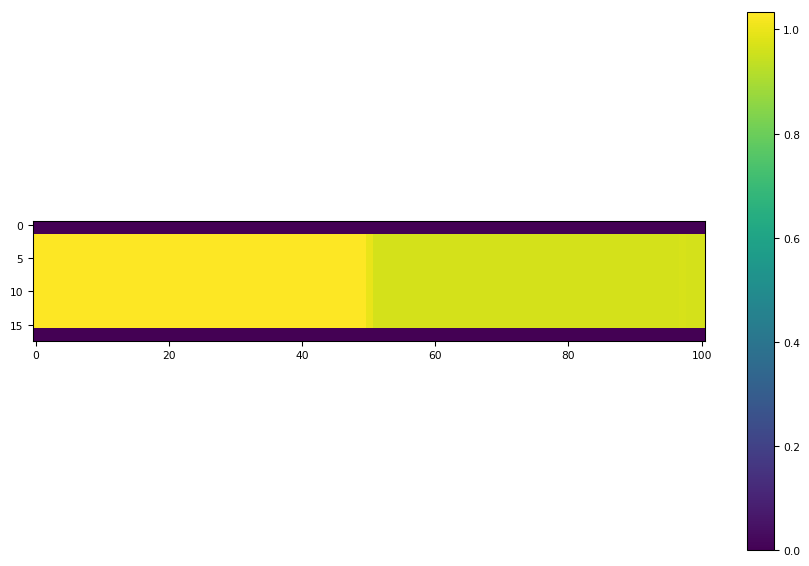

In [34]:
tifffile.imshow(np.vstack([np.zeros(a.shape),np.zeros(a.shape),a,a,a,a,a,a,a,a,a,a,a,a,a,a,np.zeros(a.shape),np.zeros(a.shape)]))

In [53]:
def center_of_mass(data,xcor):
    center = np.sum((data)*xcor)/np.sum((data))
    return int(np.round(center,3))

n = 100000
output_data = []
while n>=0:
    scale = 100
    base = 1
    data = (base+base*np.random.uniform(size=101))
    data = 2*(data-data.min())/(data.max()-data.min())
    center = center_of_mass(data,np.arange(len(data)))
    if data[:center].mean() < data[center:].mean():
        data = np.flip(data)
    output_data.append(data)
    n -= 1

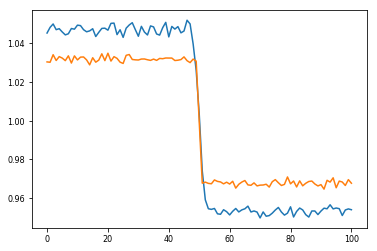

In [54]:
plt.plot(np.average(np.array(output_data),axis=0))
plt.plot(np.average(np.array(output_data_1),axis=0))

In [75]:
int(101/2)

50

In [120]:
def subtract_alignment_bias(data,adjust_factor = 0.9685):
    half = int(0.5*data.shape[0])
    corrected_data = data.copy()
    corrected_data[:half] *= adjust_factor
    corrected_data[-half:] /= adjust_factor
    return corrected_data

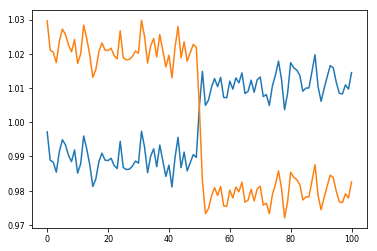

In [121]:
a = np.average(np.array(output_data_1),axis=0)
plt.plot(subtract_alignment_bias(a))
plt.plot(a)